In [28]:
import pandas as pd
import json
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [29]:
data = pd.read_json(r'../..//data/SIR_train_set.json')
CVE_ID = data["CVE_ID"]

In [30]:
columns_1 = ['baseScore', 'impactScore', 'exploitabilityScore', 'severity']
train_data = data[columns_1]
train_data

baseScore  impactScore  exploitabilityScore  severity
0           7.5          3.6                  3.9      HIGH
1           9.8          5.9                  3.9  CRITICAL
2           7.5          3.6                  3.9      HIGH
3           8.1          5.9                  2.2      HIGH
4           8.8          5.9                  2.8      HIGH
...         ...          ...                  ...       ...
5619        7.5          3.6                  3.9      HIGH
5620        6.1          2.7                  2.8    MEDIUM
5621        6.5          3.6                  2.8    MEDIUM
5622        6.5          3.6                  2.8    MEDIUM
5623        5.4          2.7                  2.3    MEDIUM

[5624 rows x 4 columns]

In [31]:
vectorString = data['vectorString']
vectorString

0       CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:N/A:N
1       CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H
2       CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:N/A:N
3       CVSS:3.0/AV:N/AC:H/PR:N/UI:N/S:U/C:H/I:H/A:H
4       CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H
                            ...                     
5619    CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H
5620    CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:C/C:L/I:L/A:N
5621    CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:N/I:H/A:N
5622    CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:N/I:H/A:N
5623    CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N
Name: vectorString, Length: 5624, dtype: object

In [32]:
# 打开并读取JSON文件
with open('../..//data/label_word_ids_CVSS2.json', 'r') as file:
    # 解析JSON文件
    cvss2 = json.load(file)
cvss2

{'AV': {'network': 2897, 'adjacent': 5516, 'local': 2334},
 'AC': {'low': 2659, 'medium': 5396, 'high': 2152},
 'Au': {'none': 3904, 'single': 2309, 'multiple': 3674},
 'C': {'none': 3904, 'partial': 7704, 'complete': 3143},
 'I': {'none': 3904, 'partial': 7704, 'complete': 3143},
 'A': {'none': 3904, 'partial': 7704, 'complete': 3143},
 'severity': {'low': 2659, 'medium': 5396, 'high': 2152}}

In [33]:
# 打开并读取JSON文件
with open('../../data/label_word_ids.json', 'r') as file:
    # 解析JSON文件
    cvss = json.load(file)
cvss['AV']
len(cvss)

9

In [34]:
columns_2 = ['AV', 'AC', 'PR', 'UI', 'S', 'C', 'I', 'A']
for column in columns_2:
    cvss[column] = {k[0].upper(): v for k, v in cvss[column].items()}
# 计算每一行的总值
summ = {key: sum(values.values()) for key, values in cvss.items()}

# 计算每个值除以总值
cvss = {
    key: {subkey: value / summ[key] for subkey, value in values.items()}
    for key, values in cvss.items()
}
cvss

{'AV': {'N': 0.20251660258650822,
  'A': 0.38559944075498076,
  'L': 0.16315973435861586,
  'P': 0.24872422229989513},
 'AC': {'L': 0.5526917480773228, 'H': 0.4473082519226772},
 'PR': {'N': 0.44796328169822147,
  'L': 0.3051061388410786,
  'H': 0.24693057946069993},
 'UI': {'N': 0.5477760628595482, 'R': 0.4522239371404518},
 'S': {'U': 0.8439380911435942, 'C': 0.15606190885640583},
 'C': {'N': 0.44796328169822147,
  'L': 0.3051061388410786,
  'H': 0.24693057946069993},
 'I': {'N': 0.44796328169822147,
  'L': 0.3051061388410786,
  'H': 0.24693057946069993},
 'A': {'N': 0.44796328169822147,
  'L': 0.3051061388410786,
  'H': 0.24693057946069993},
 'severity': {'low': 0.18472974850632207,
  'medium': 0.37487842156454076,
  'high': 0.14950673891899402,
  'critical': 0.2908850910101431}}

In [35]:
#转换数据
def transform_value(val):
    return val.split(':')[1]
temp = []
for i in range(vectorString.size):
    part =  vectorString[i].split('/')
    list_items = part[1::]
    temp.append(list_items)
train_data_temp = pd.DataFrame(temp, columns=columns_2)
train_data_temp = train_data_temp.applymap(transform_value)
train_data_temp

C:\Users\lx\AppData\Local\Temp\ipykernel_58136\555386878.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data_temp = train_data_temp.applymap(transform_value)


AV AC PR UI  S  C  I  A
0     N  L  N  N  U  H  N  N
1     N  L  N  N  U  H  H  H
2     N  L  N  N  U  H  N  N
3     N  H  N  N  U  H  H  H
4     N  L  N  R  U  H  H  H
...  .. .. .. .. .. .. .. ..
5619  N  L  N  N  U  N  N  H
5620  N  L  N  R  C  L  L  N
5621  N  L  N  R  U  N  H  N
5622  N  L  N  R  U  N  H  N
5623  N  L  L  R  C  L  L  N

[5624 rows x 8 columns]

In [36]:
# 替换 DataFrame 中的值
train_data_temp.replace(cvss, inplace=True)
train_data_temp

C:\Users\lx\AppData\Local\Temp\ipykernel_58136\1422158133.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_temp.replace(cvss, inplace=True)


AV        AC        PR        UI         S         C         I  \
0     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.447963   
1     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.246931   
2     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.447963   
3     0.202517  0.447308  0.447963  0.547776  0.843938  0.246931  0.246931   
4     0.202517  0.552692  0.447963  0.452224  0.843938  0.246931  0.246931   
...        ...       ...       ...       ...       ...       ...       ...   
5619  0.202517  0.552692  0.447963  0.547776  0.843938  0.447963  0.447963   
5620  0.202517  0.552692  0.447963  0.452224  0.156062  0.305106  0.305106   
5621  0.202517  0.552692  0.447963  0.452224  0.843938  0.447963  0.246931   
5622  0.202517  0.552692  0.447963  0.452224  0.843938  0.447963  0.246931   
5623  0.202517  0.552692  0.305106  0.452224  0.156062  0.305106  0.305106   

             A  
0     0.447963  
1     0.246931  
2     0.447963  
3     0.246931  
4     0.246931  
...        ...  
5619  0.246931  
5620  0.447963  
5621  0.447963  
5622  0.447963  
5623  0.447963  

[5624 rows x 8 columns]

In [37]:
train_data = pd.concat([train_data_temp, train_data], axis=1)
train_data

AV        AC        PR        UI         S         C         I  \
0     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.447963   
1     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.246931   
2     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.447963   
3     0.202517  0.447308  0.447963  0.547776  0.843938  0.246931  0.246931   
4     0.202517  0.552692  0.447963  0.452224  0.843938  0.246931  0.246931   
...        ...       ...       ...       ...       ...       ...       ...   
5619  0.202517  0.552692  0.447963  0.547776  0.843938  0.447963  0.447963   
5620  0.202517  0.552692  0.447963  0.452224  0.156062  0.305106  0.305106   
5621  0.202517  0.552692  0.447963  0.452224  0.843938  0.447963  0.246931   
5622  0.202517  0.552692  0.447963  0.452224  0.843938  0.447963  0.246931   
5623  0.202517  0.552692  0.305106  0.452224  0.156062  0.305106  0.305106   

             A  baseScore  impactScore  exploitabilityScore  severity  
0     0.447963        7.5          3.6                  3.9      HIGH  
1     0.246931        9.8          5.9                  3.9  CRITICAL  
2     0.447963        7.5          3.6                  3.9      HIGH  
3     0.246931        8.1          5.9                  2.2      HIGH  
4     0.246931        8.8          5.9                  2.8      HIGH  
...        ...        ...          ...                  ...       ...  
5619  0.246931        7.5          3.6                  3.9      HIGH  
5620  0.447963        6.1          2.7                  2.8    MEDIUM  
5621  0.447963        6.5          3.6                  2.8    MEDIUM  
5622  0.447963        6.5          3.6                  2.8    MEDIUM  
5623  0.447963        5.4          2.7                  2.3    MEDIUM  

[5624 rows x 12 columns]

In [38]:
category_replacement = {'HIGH':0.14950673891899402, 'MEDIUM':0.37487842156454076, 'CRITICAL':0.2908850910101431, 'LOW':0.18472974850632207}
train_data['severity'] = train_data['severity'].replace(category_replacement)
train_data

C:\Users\lx\AppData\Local\Temp\ipykernel_58136\4130220277.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['severity'] = train_data['severity'].replace(category_replacement)


AV        AC        PR        UI         S         C         I  \
0     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.447963   
1     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.246931   
2     0.202517  0.552692  0.447963  0.547776  0.843938  0.246931  0.447963   
3     0.202517  0.447308  0.447963  0.547776  0.843938  0.246931  0.246931   
4     0.202517  0.552692  0.447963  0.452224  0.843938  0.246931  0.246931   
...        ...       ...       ...       ...       ...       ...       ...   
5619  0.202517  0.552692  0.447963  0.547776  0.843938  0.447963  0.447963   
5620  0.202517  0.552692  0.447963  0.452224  0.156062  0.305106  0.305106   
5621  0.202517  0.552692  0.447963  0.452224  0.843938  0.447963  0.246931   
5622  0.202517  0.552692  0.447963  0.452224  0.843938  0.447963  0.246931   
5623  0.202517  0.552692  0.305106  0.452224  0.156062  0.305106  0.305106   

             A  baseScore  impactScore  exploitabilityScore  severity  
0     0.447963        7.5          3.6                  3.9  0.149507  
1     0.246931        9.8          5.9                  3.9  0.290885  
2     0.447963        7.5          3.6                  3.9  0.149507  
3     0.246931        8.1          5.9                  2.2  0.149507  
4     0.246931        8.8          5.9                  2.8  0.149507  
...        ...        ...          ...                  ...       ...  
5619  0.246931        7.5          3.6                  3.9  0.149507  
5620  0.447963        6.1          2.7                  2.8  0.374878  
5621  0.447963        6.5          3.6                  2.8  0.374878  
5622  0.447963        6.5          3.6                  2.8  0.374878  
5623  0.447963        5.4          2.7                  2.3  0.374878  

[5624 rows x 12 columns]

In [39]:
# 复制元数据col
new_col = train_data.columns

In [40]:
# PCA降维
pca=PCA(3)
pca.fit(train_data)
new_data=pca.transform(train_data)
new_data.shape

(5624, 3)

In [41]:
# 对数据进行预处理标准化
scaler=preprocessing.StandardScaler().fit(new_data)
data_s=pd.DataFrame(scaler.fit_transform(new_data,y=train_data.columns))
data_s.head(10)

0         1         2
0  0.013773  1.328624  0.647031
1  1.539486  0.577848 -0.185040
2  0.013773  1.328624  0.647031
3  0.763329 -1.328923  0.107140
4  1.074067 -0.631252 -0.089019
5  1.073885 -0.633773 -0.097836
6  0.616217 -1.754719  0.053234
7  0.013862  1.327285  0.635674
8 -0.889005  0.561839 -1.746661
9  1.073885 -0.633773 -0.097836

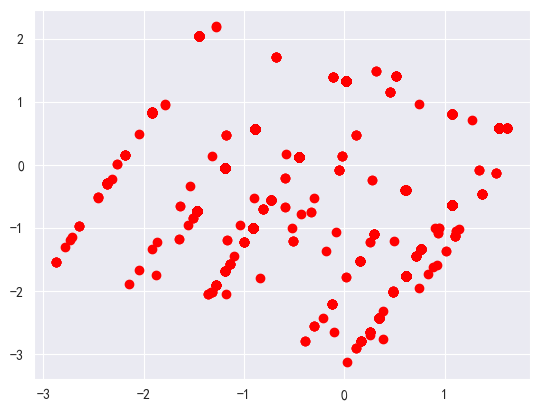

In [42]:
# 元数据散点图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(data_s[0],data_s[1],c='r',label='散点')
plt.savefig("cluster1.svg", dpi=300,format="svg")
plt.show()

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Text(0, 0.5, '$J(C_K)$')

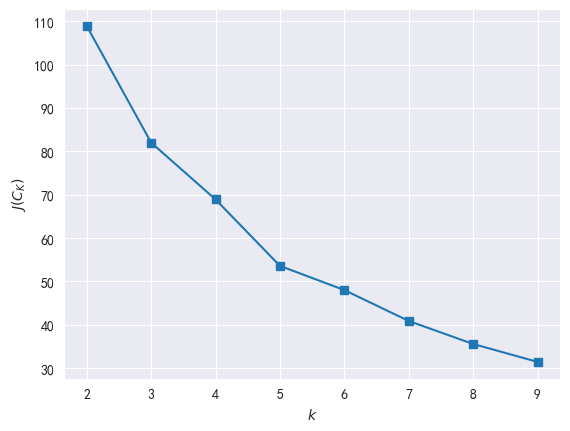

In [44]:
# 确定Kmeans K值
inertia=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_s)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2,10),inertia,marker='s')
plt.xlabel('$k$') # K
plt.ylabel('$J(C_K)$') # 误差平方和

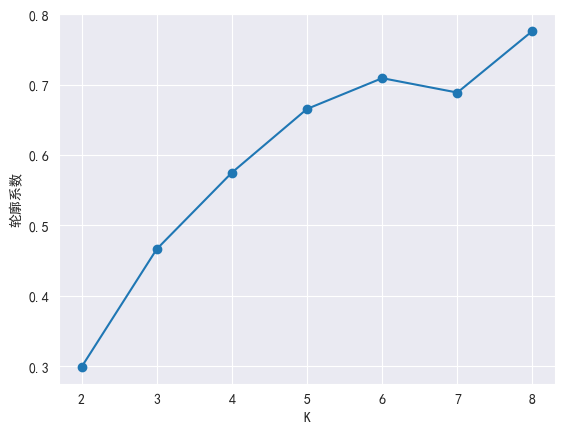

In [45]:
plt.ylabel('$J(C_K)$')  # 误差平方和
# 存放轮廓系数
Scores = []
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  #构造聚类器
    estimator.fit(data_s)
    Scores.append(silhouette_score(data_s, estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('K')
plt.ylabel('轮廓系数')
plt.plot(X, Scores, 'o-')
plt.show()

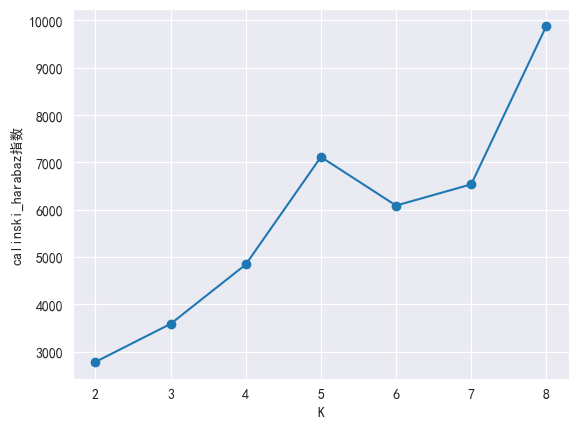

In [46]:
# calinski_haarbaz指数
from sklearn.metrics import calinski_harabasz_score
haraba=[]
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2,9):
    estimator=KMeans(n_clusters=k) #构造聚类器
    estimator.fit(data_s)
    haraba.append(calinski_harabasz_score(data_s,estimator.labels_))
X=range(2,9)
plt.xlabel('K')
plt.ylabel('calinski_harabaz指数')
plt.plot(X,haraba,'o-')
plt.show()

In [47]:
#建立模型
cluster=KMeans(n_clusters=4,random_state=5).fit(data_s)

In [48]:
#聚类中心
centers=cluster.cluster_centers_ #聚类中心
centers

array([[ 0.36355751, -1.81817227,  0.18306699],
       [-0.95490222,  0.17679215, -1.69155755],
       [ 1.31656935,  0.10349958, -0.16019117],
       [-0.51047021,  0.36281987,  0.90438576]])

In [49]:
# 查看总距离平方和
inertia = cluster.inertia_
inertia

4749.265326507992

In [50]:
# 轮廓系数均值
c_preds1 = cluster.labels_
silhouette_score(data_s,c_preds1)

0.5513427055662409

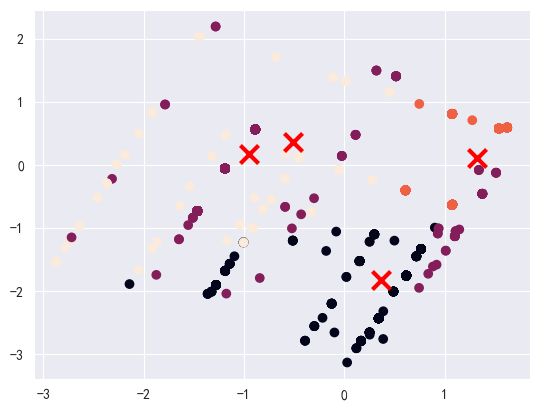

In [51]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data_s.values[:, 0], data_s.values[:, 1], c=c_preds1)#原始数据散点图，按照分类查看
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10) # 重心红色X进行突出
plt.savefig("cluster.svg", dpi=300,format="svg")

In [52]:
# 层次聚类
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
res = clustering.fit(data_s)

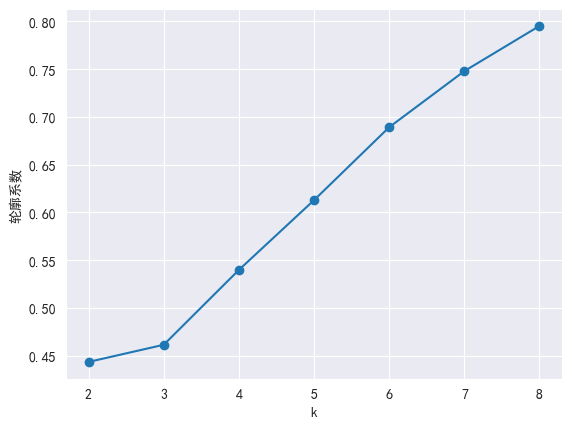

In [53]:
# 存放轮廓系数
Scores = []
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2, 9):
    estimator = AgglomerativeClustering(n_clusters=k)  # 构造聚类器
    estimator.fit(data_s)
    Scores.append(silhouette_score(data_s, estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X, Scores, 'o-')
plt.show()

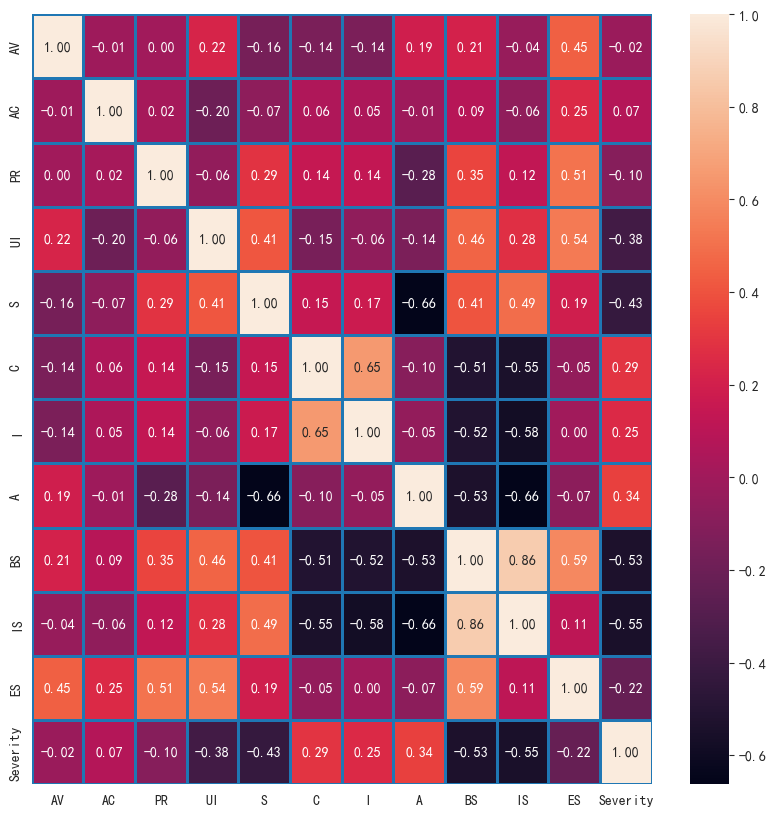

In [54]:
# 热力图-相关性分析
import seaborn as sns
plt.figure(figsize=(10,10))
colnm=train_data.columns.tolist()[:12]
custom_x_labels = ["AV","AC","PR","UI","S","C","I","A","BS","IS","ES","Severity"]
custom_y_labels = ["AV","AC","PR","UI","S","C","I","A","BS","IS","ES","Severity"]
color = sns.color_palette()
sns.heatmap(train_data[colnm].corr(),linecolor=color[0],linewidths=1.0,annot=True,fmt='0.2f',xticklabels=custom_x_labels,yticklabels=custom_y_labels)
plt.savefig("heatmap.svg", dpi=300,format="svg")